In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"../data/processed/smart_logistics_processed.csv"

try:
    df = pd.read_csv(file_path)
    print("The dataset has been successfully loaded.")
except FileNotFoundError:
    print(f"File not found at {file_path}")

The dataset has been successfully loaded.


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                1000 non-null   datetime64[ns]
 1   Asset_ID                 1000 non-null   object        
 2   Latitude                 1000 non-null   float64       
 3   Longitude                1000 non-null   float64       
 4   Inventory_Level          1000 non-null   int64         
 5   Shipment_Status          1000 non-null   object        
 6   Temperature              1000 non-null   float64       
 7   Humidity                 1000 non-null   float64       
 8   Traffic_Status           1000 non-null   object        
 9   Waiting_Time             1000 non-null   int64         
 10  User_Transaction_Amount  1000 non-null   int64         
 11  User_Purchase_Frequency  1000 non-null   int64         
 12  Logistics_Delay_Reason   1000 non-n

In [5]:
df.isnull().sum().sum()

np.int64(0)

# Univariate Analysis

In [6]:
numerical_features = df.select_dtypes('number').columns
numerical_features = numerical_features.drop(['Latitude', 'Longitude','Year','Logistics_Delay','Is_Weekend'])
numerical_features

Index(['Inventory_Level', 'Temperature', 'Humidity', 'Waiting_Time',
       'User_Transaction_Amount', 'User_Purchase_Frequency',
       'Asset_Utilization', 'Demand_Forecast', 'Month', 'Day_of_Week',
       'Hour_of_Day'],
      dtype='object')

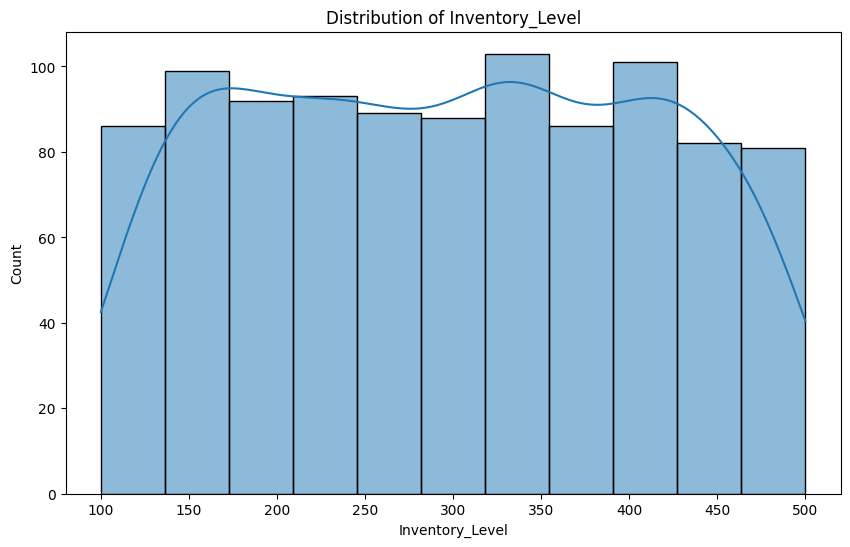

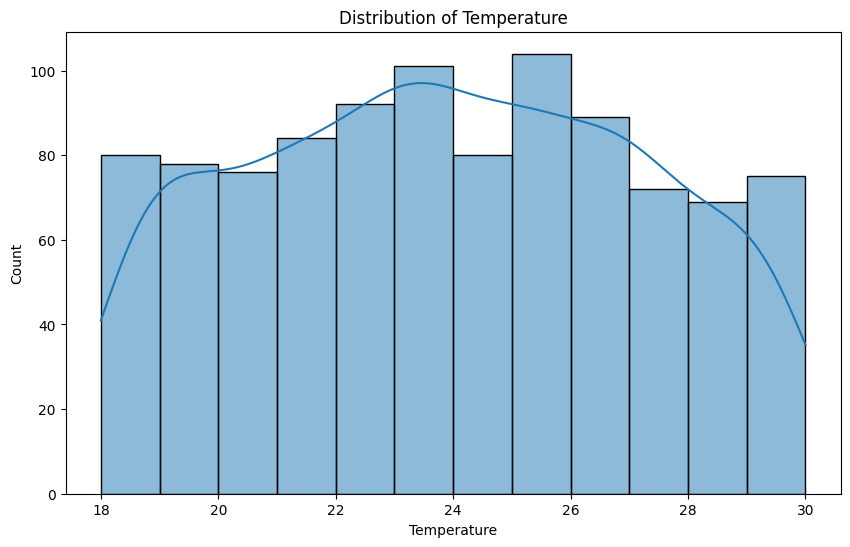

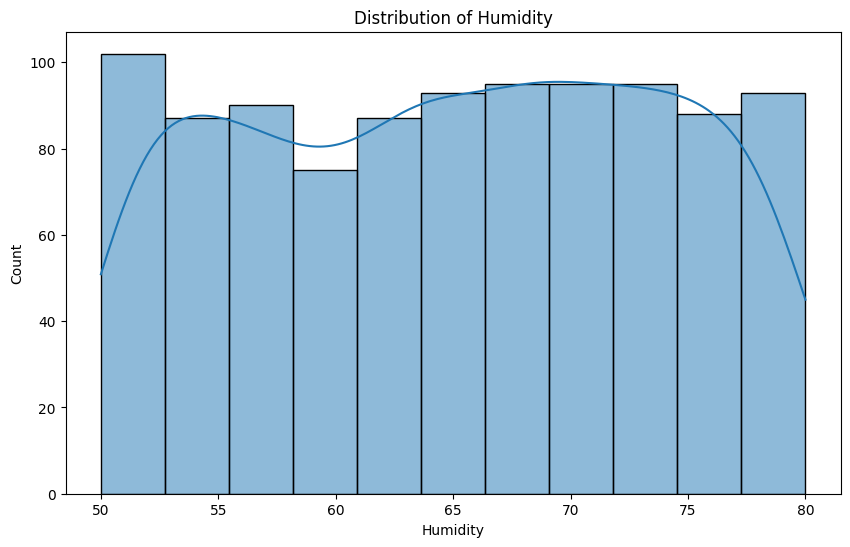

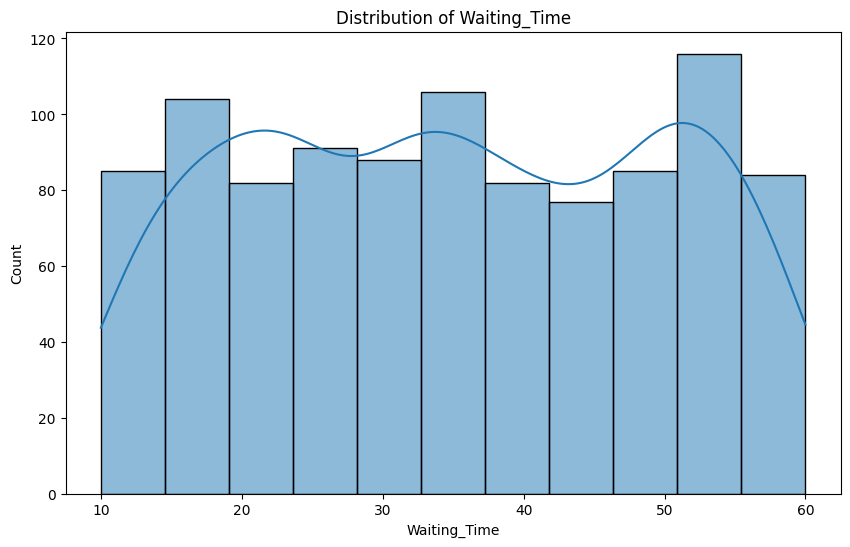

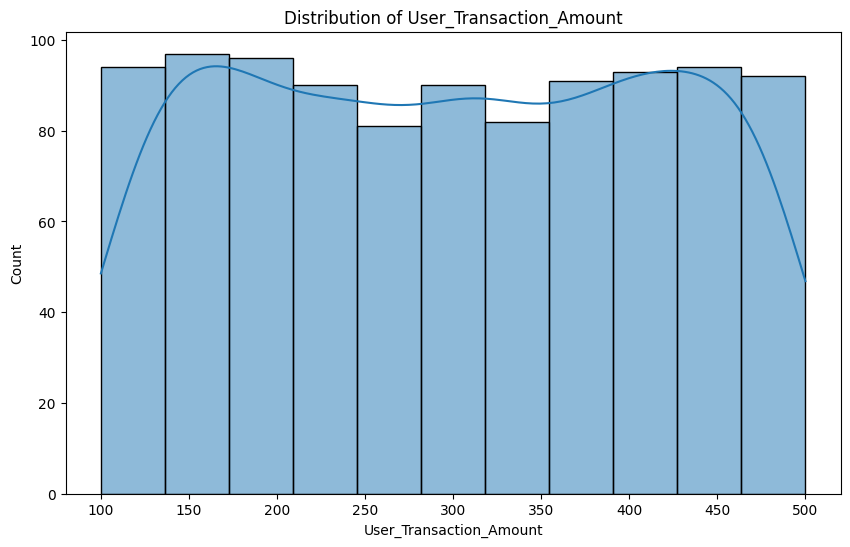

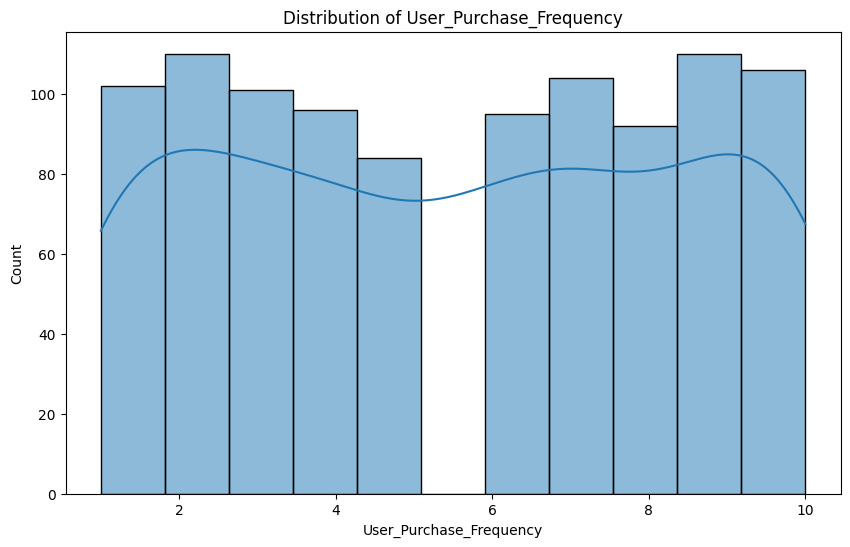

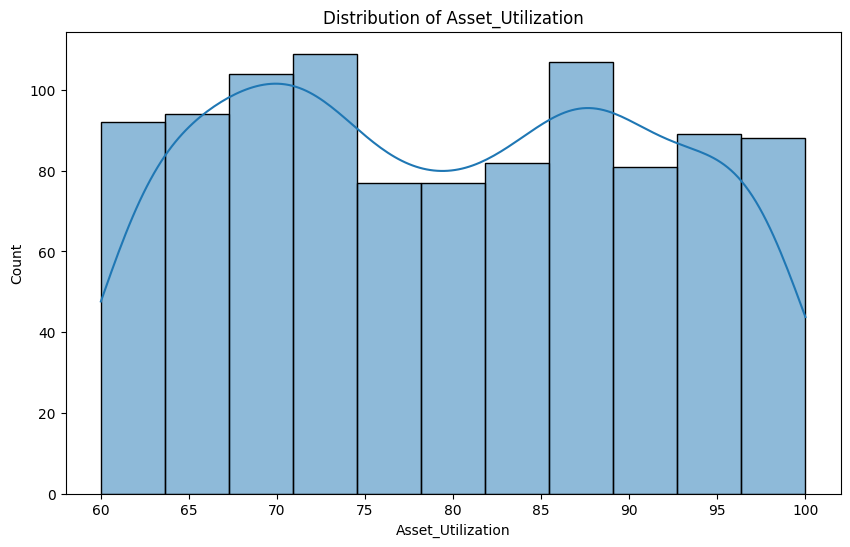

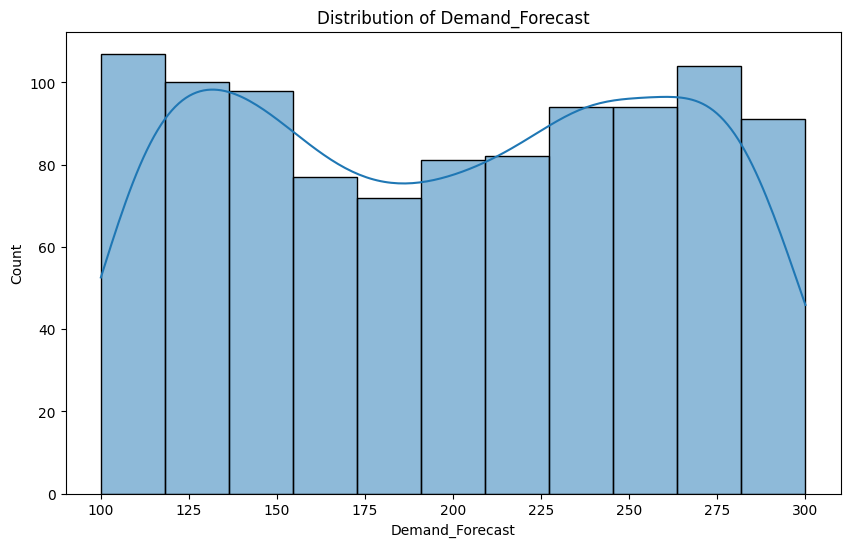

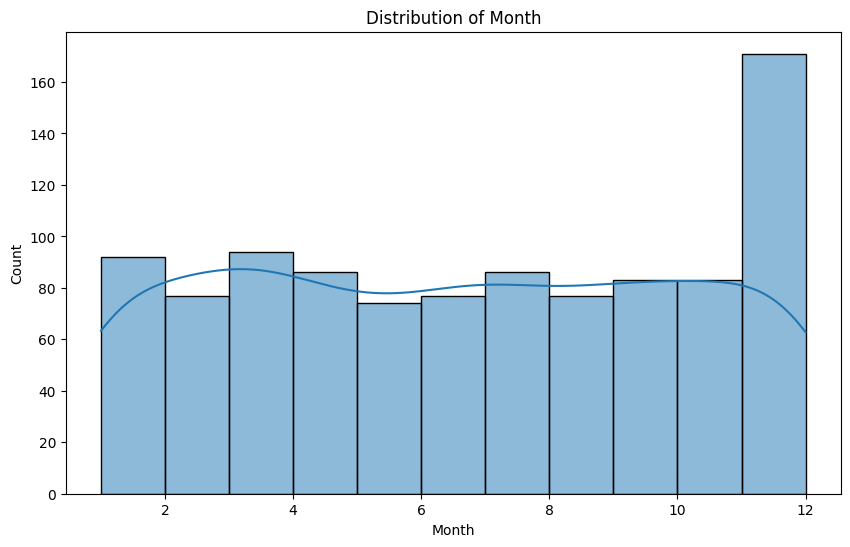

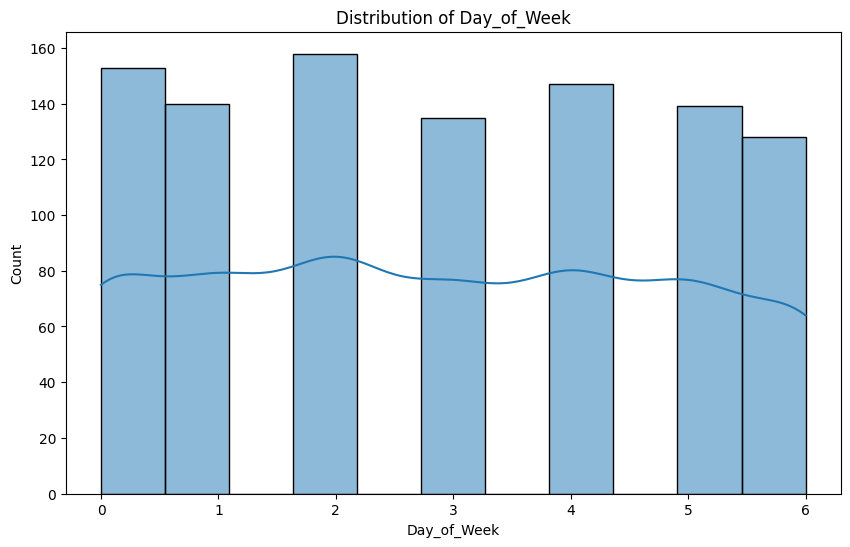

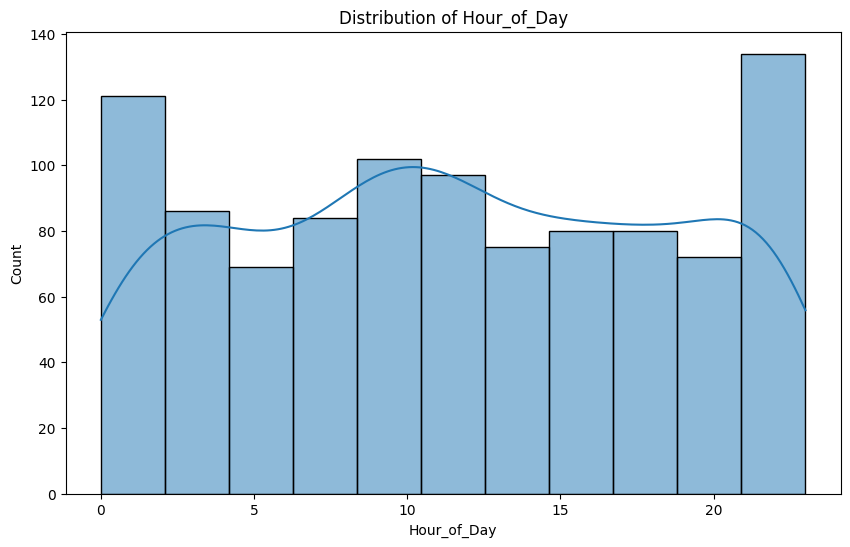

In [7]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.show()

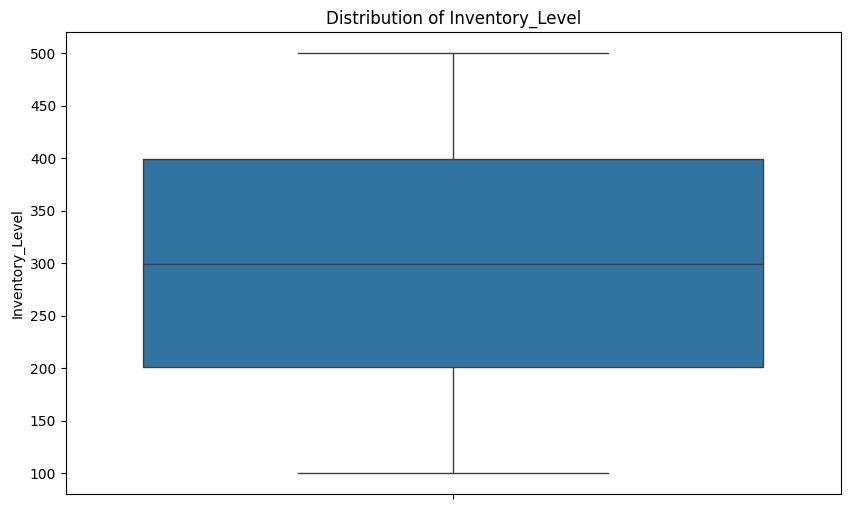

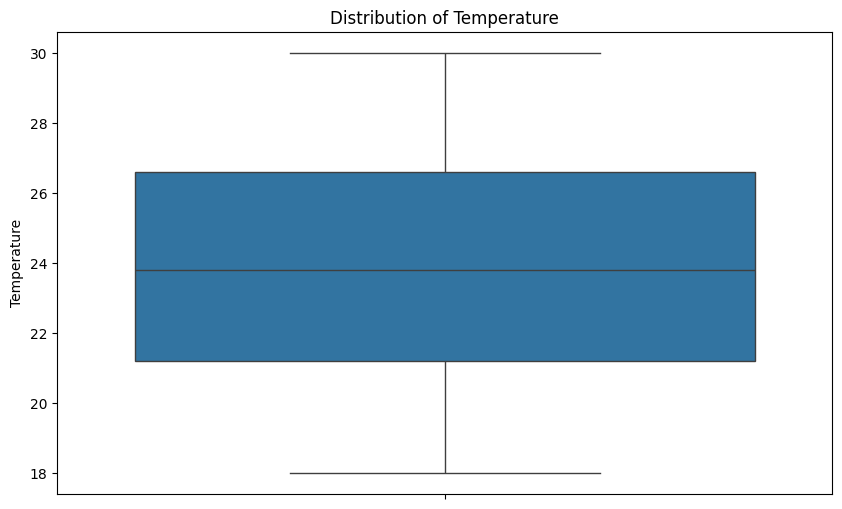

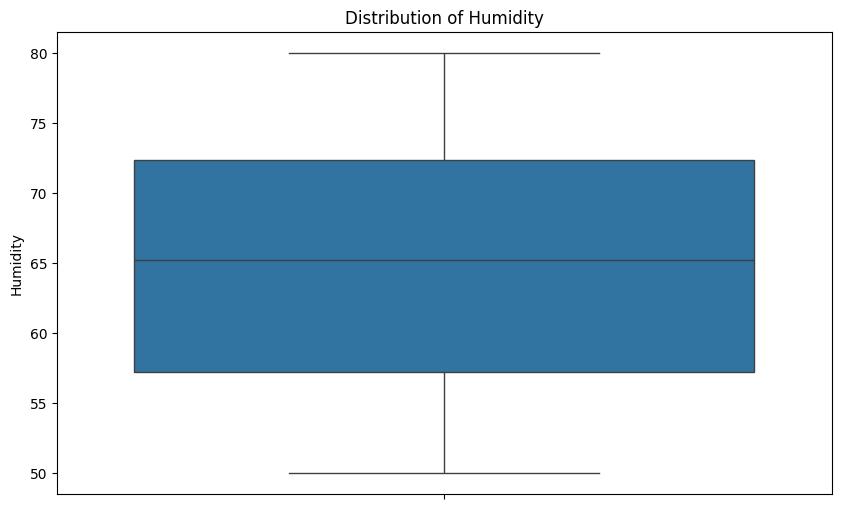

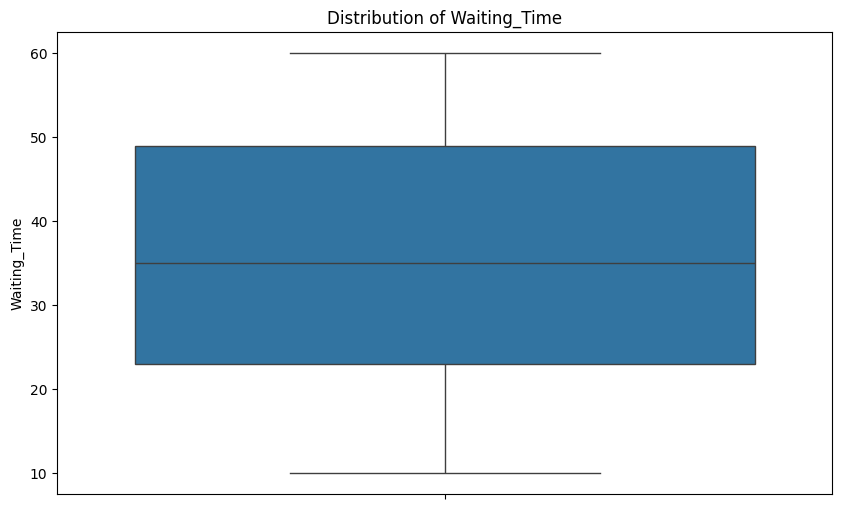

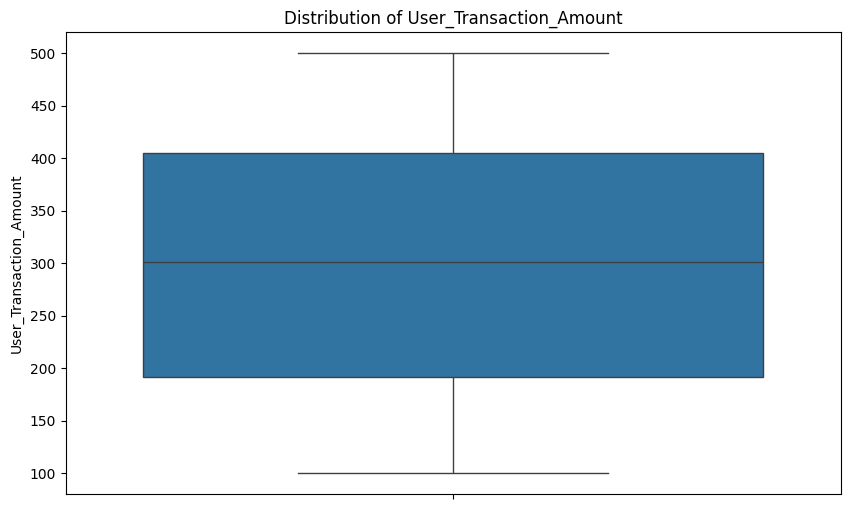

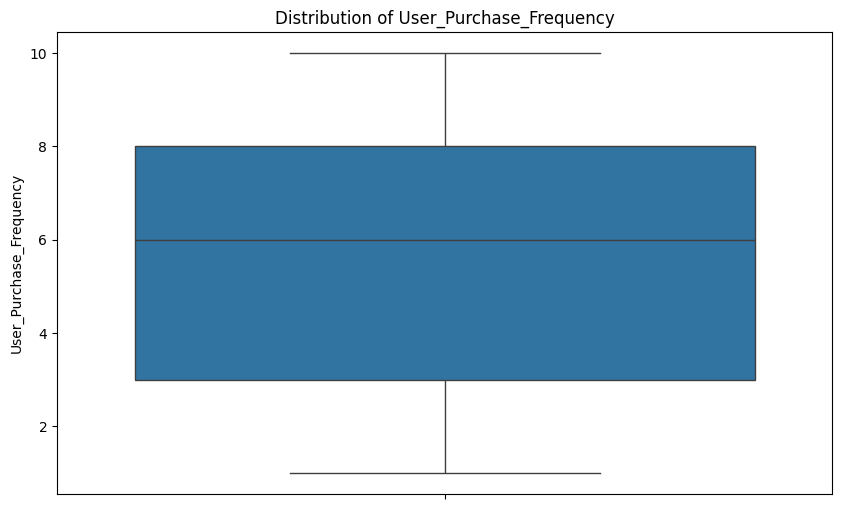

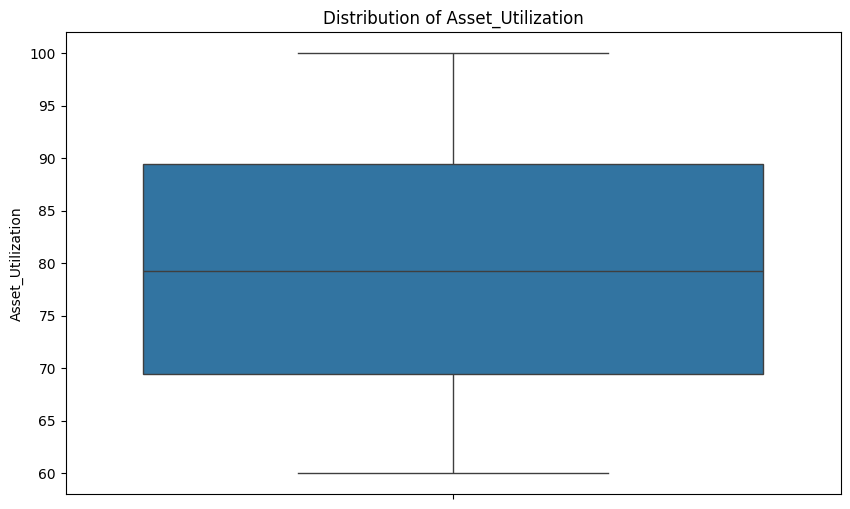

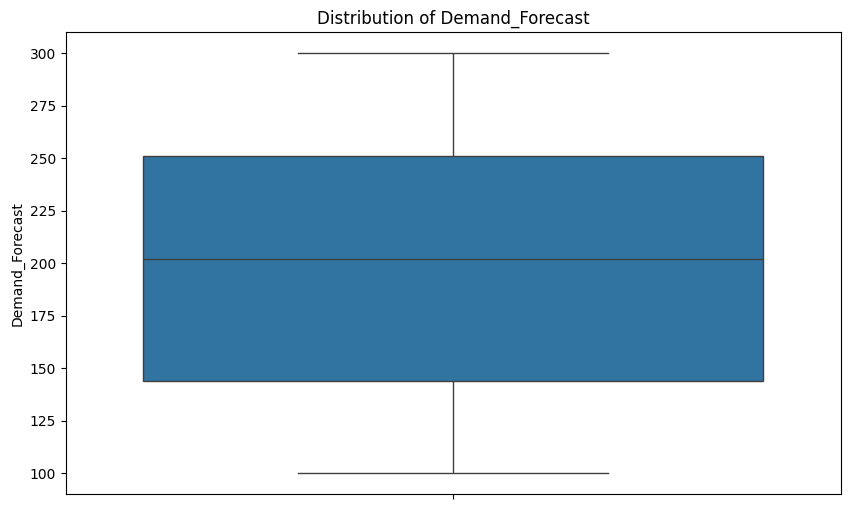

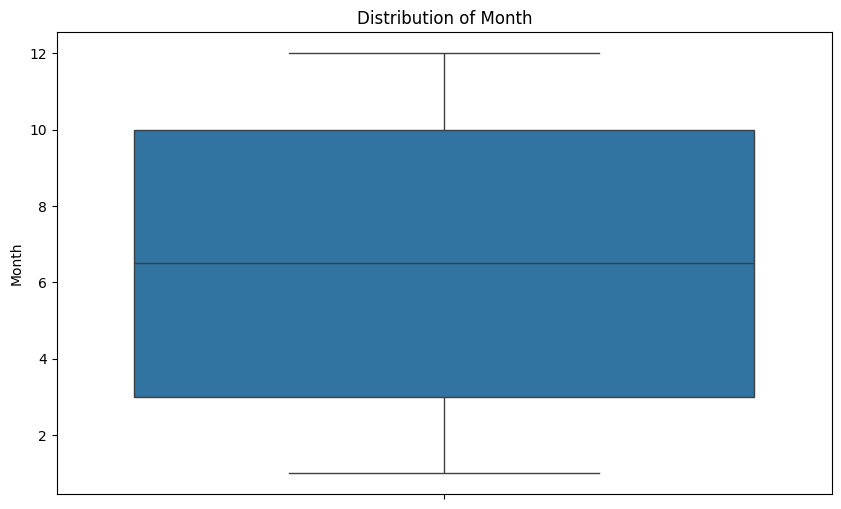

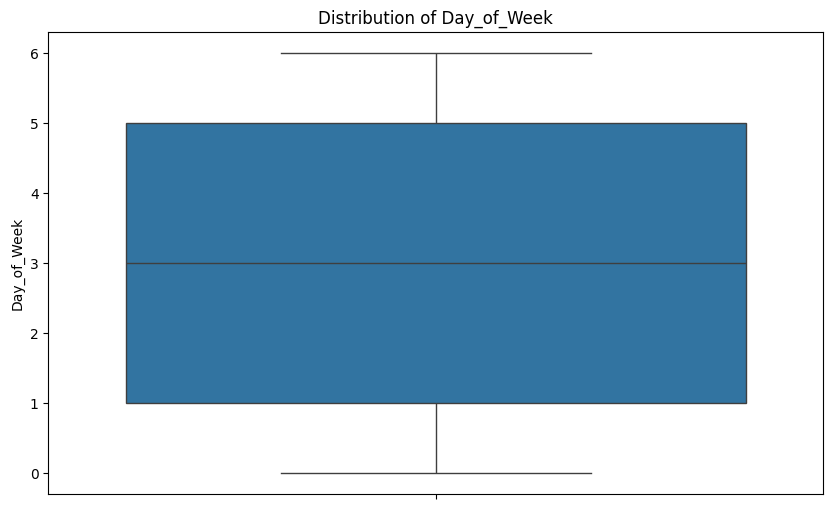

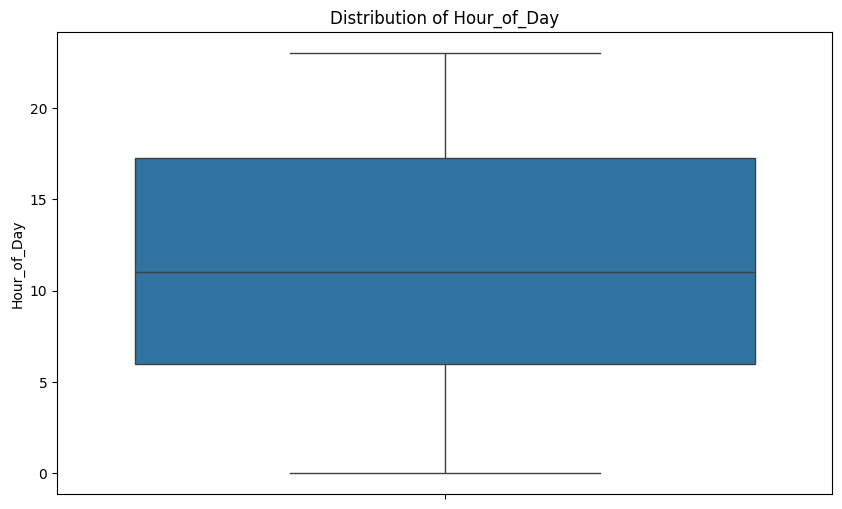

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[feature])
    plt.title(f'Distribution of {feature}')
plt.show()

In [9]:
categorical_features = df.select_dtypes('object').columns
categorical_features

Index(['Asset_ID', 'Shipment_Status', 'Traffic_Status',
       'Logistics_Delay_Reason', 'Day_Name', 'Time_of_Day'],
      dtype='object')

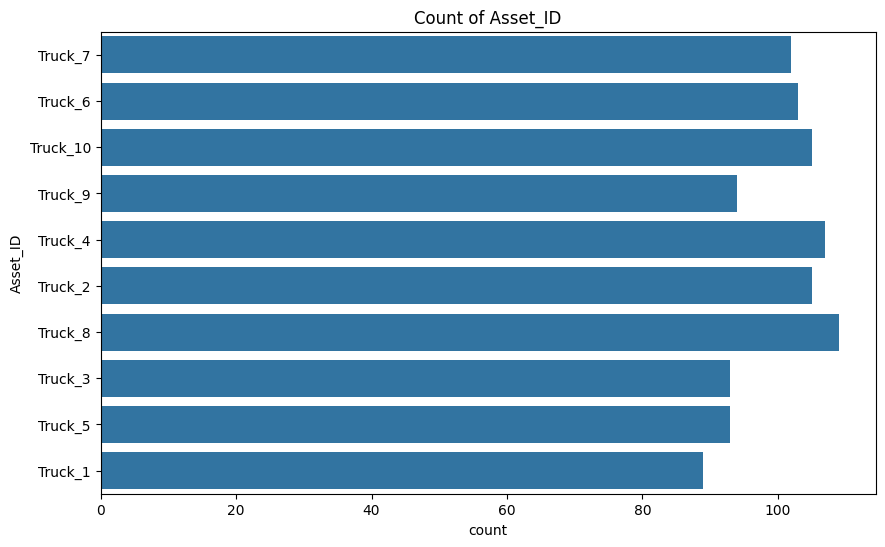

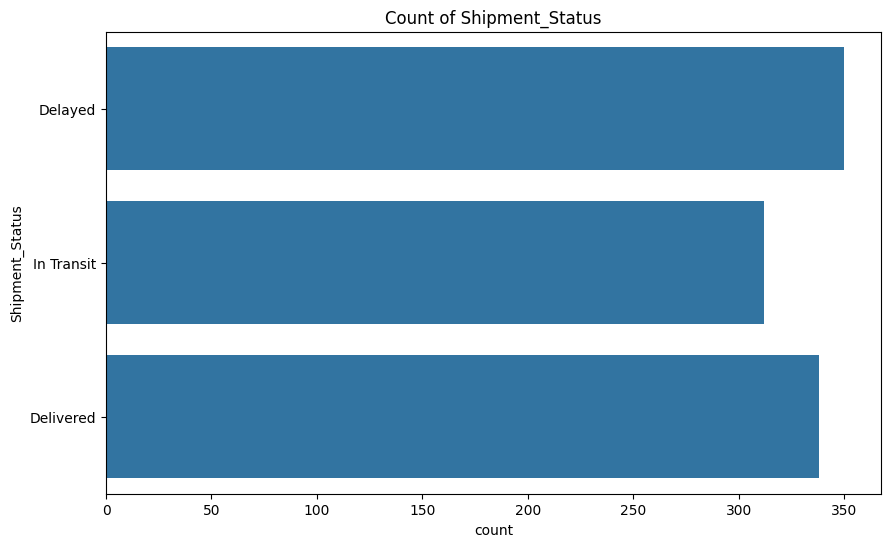

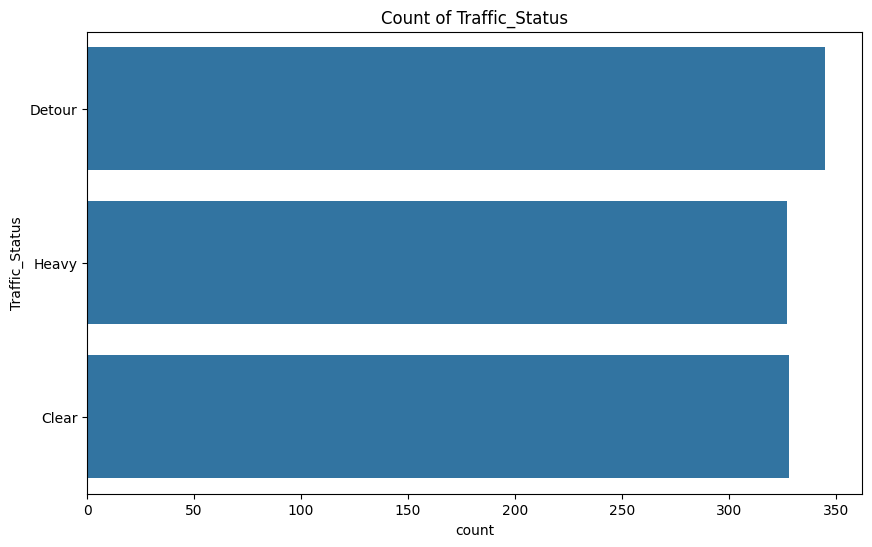

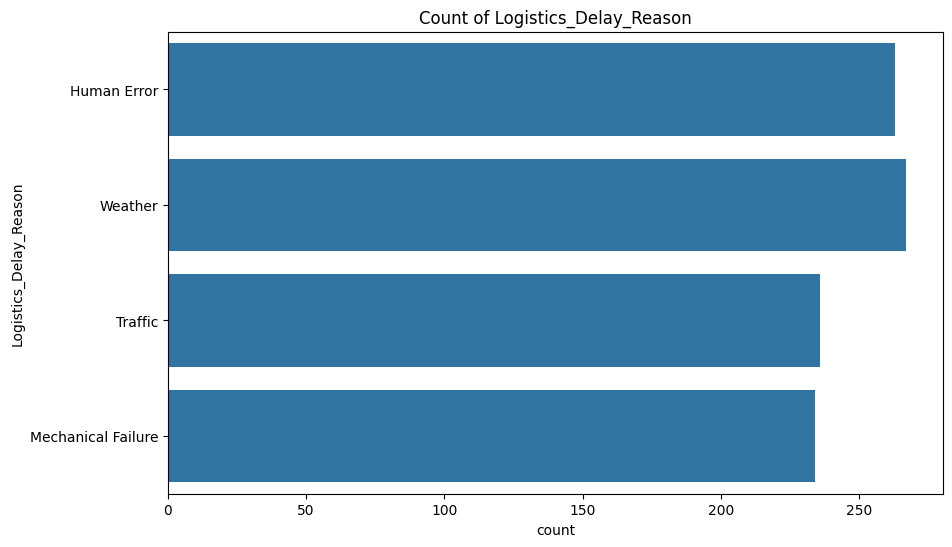

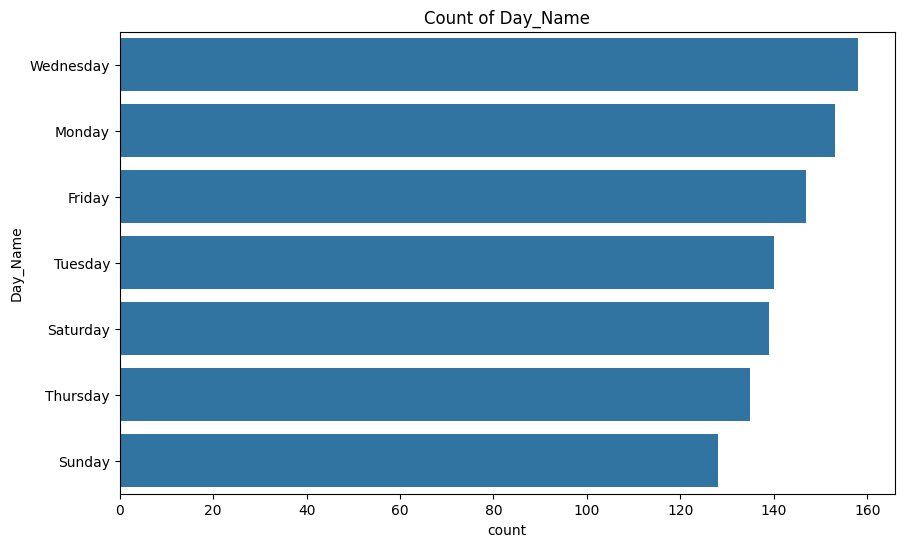

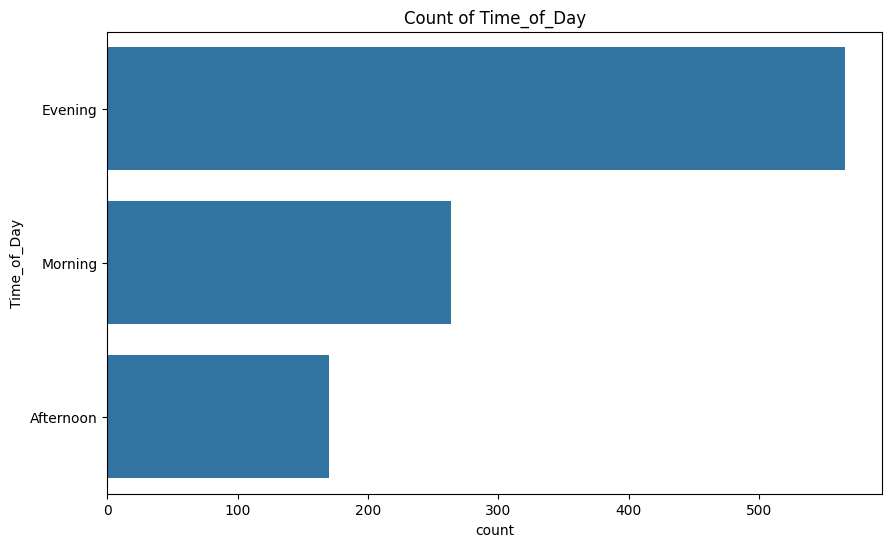

In [10]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(df[feature])
    plt.title(f'Count of {feature}')
plt.show()

# Bivariate Analysis

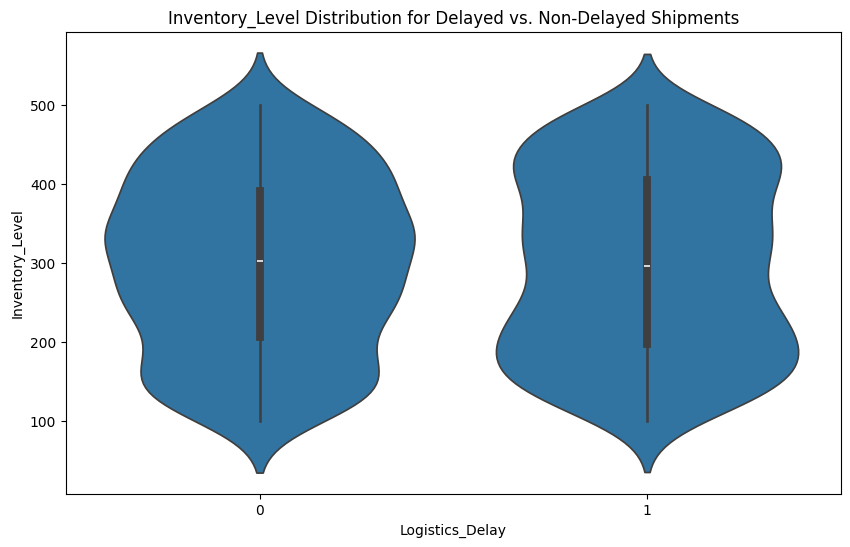

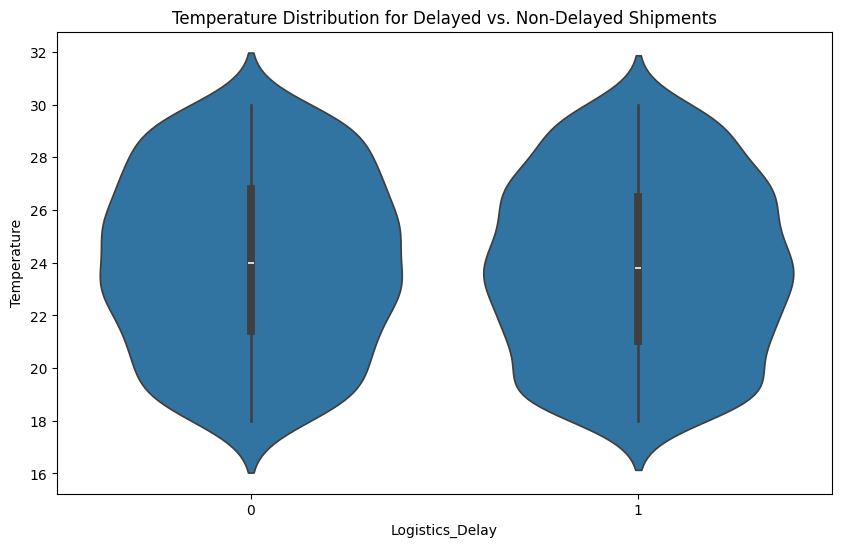

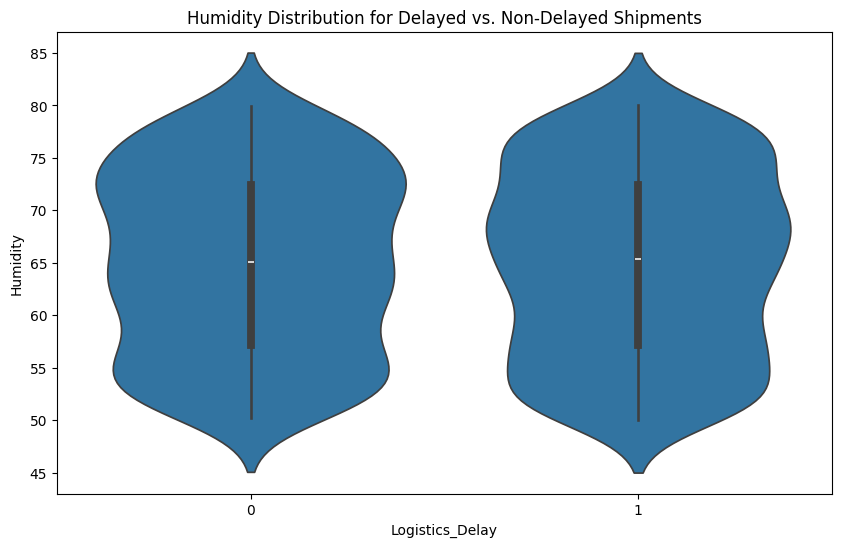

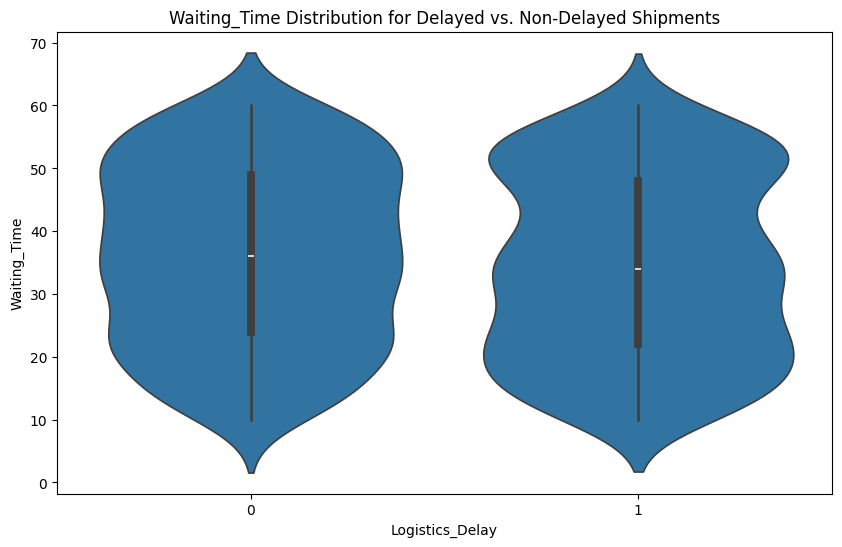

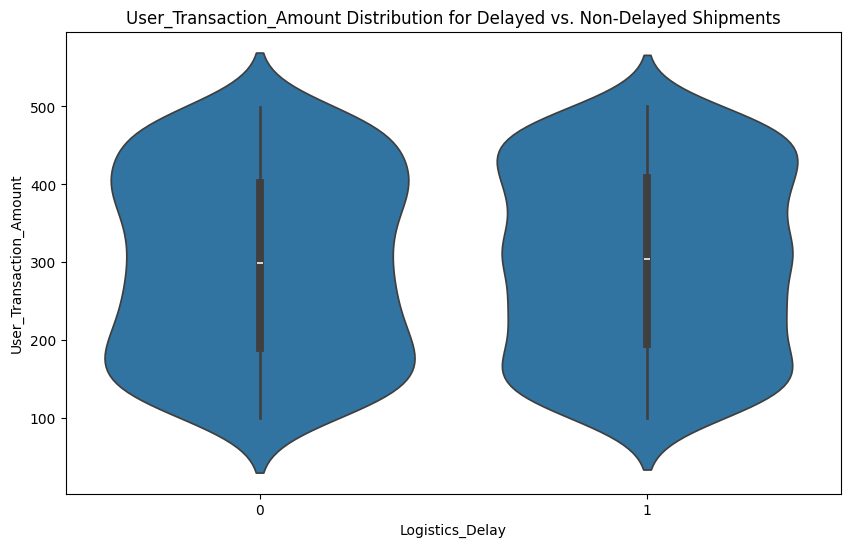

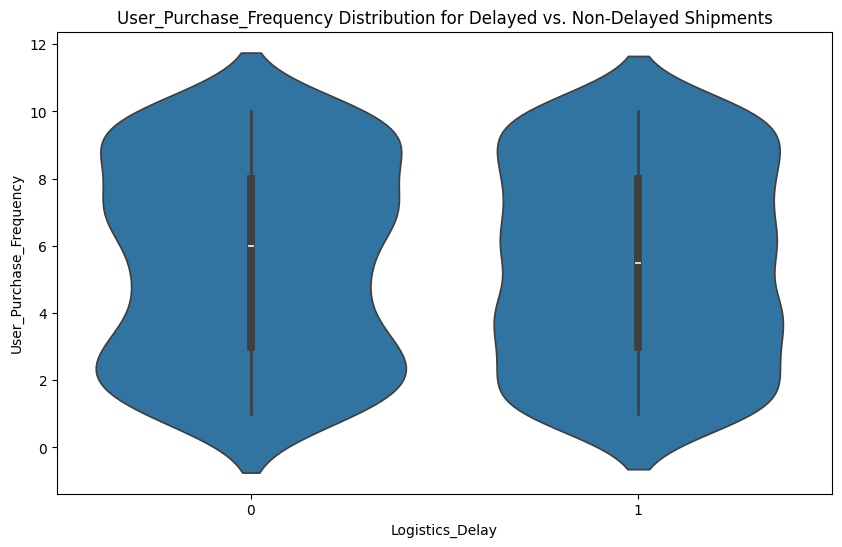

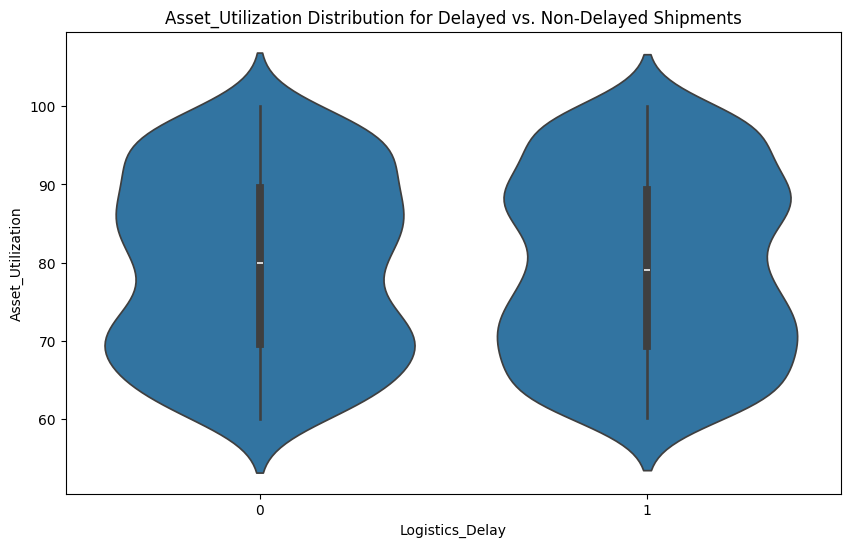

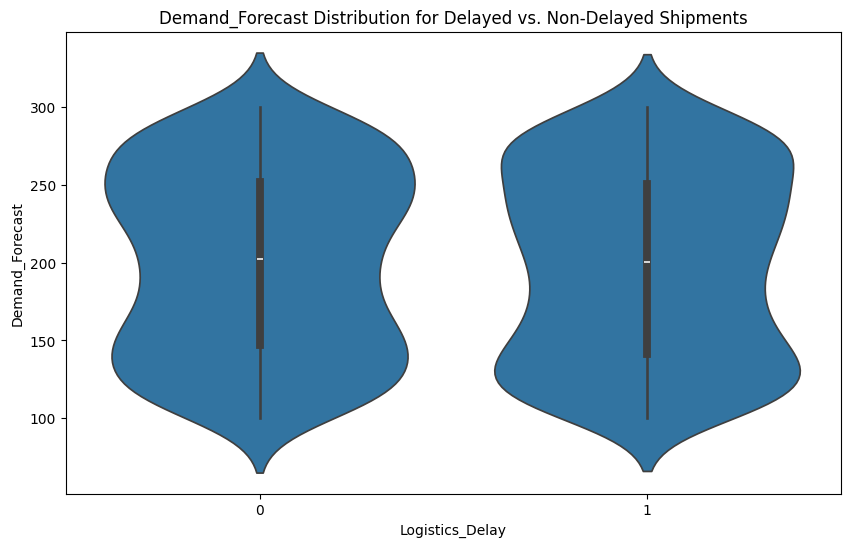

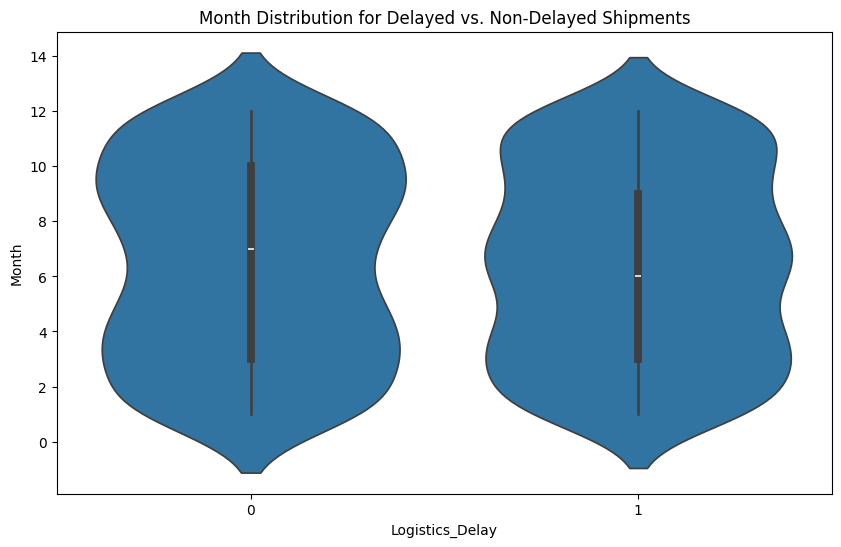

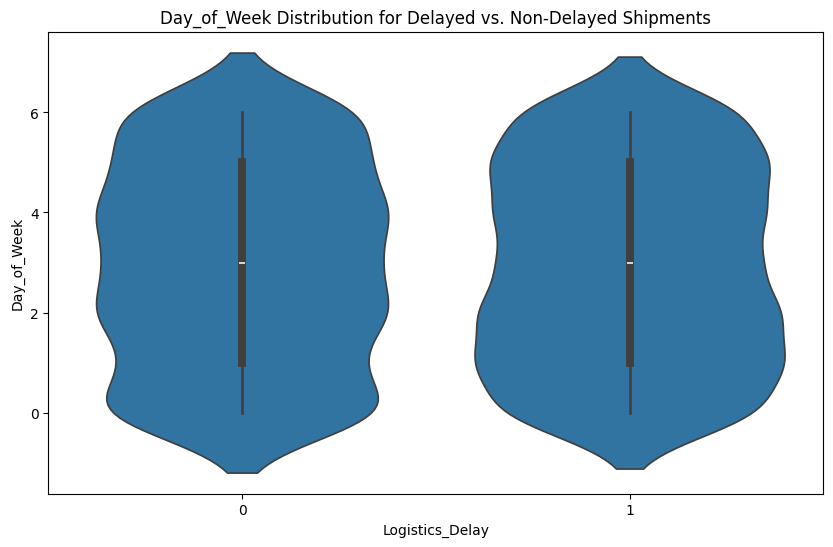

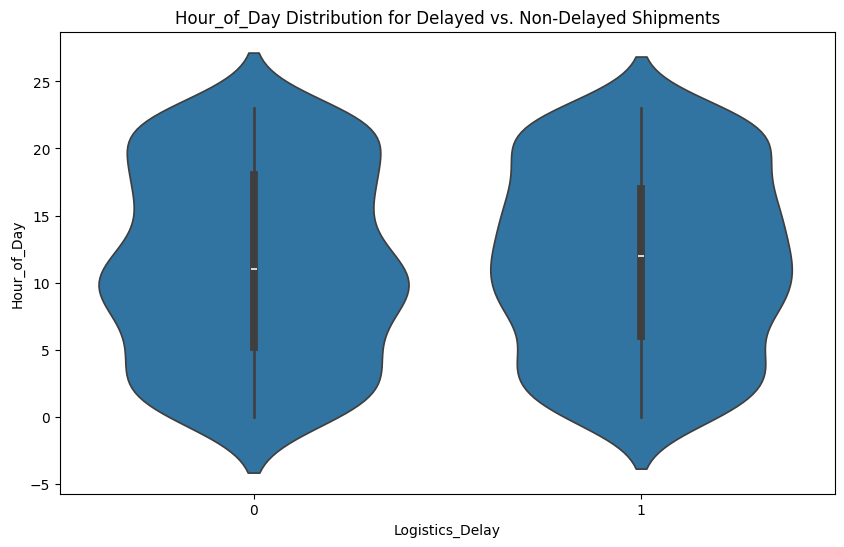

In [11]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Logistics_Delay', y=feature, data=df)
    plt.title(f'{feature} Distribution for Delayed vs. Non-Delayed Shipments')
plt.show()

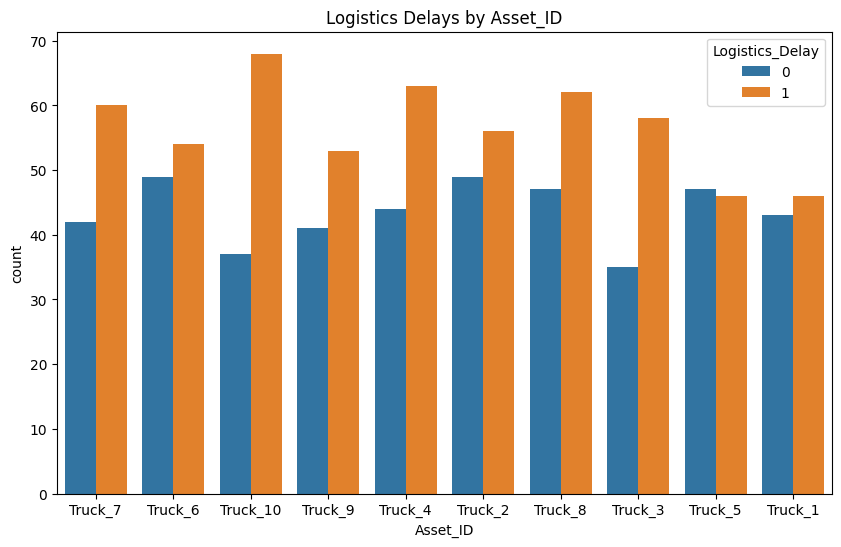

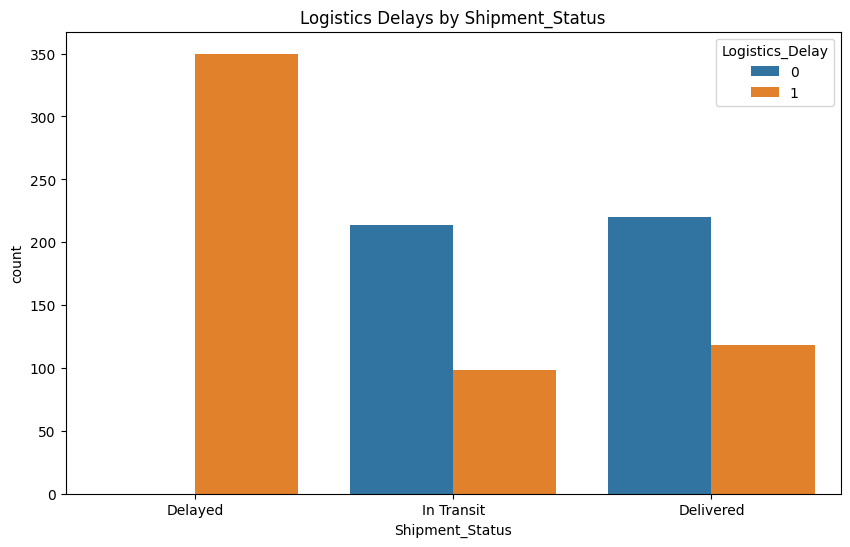

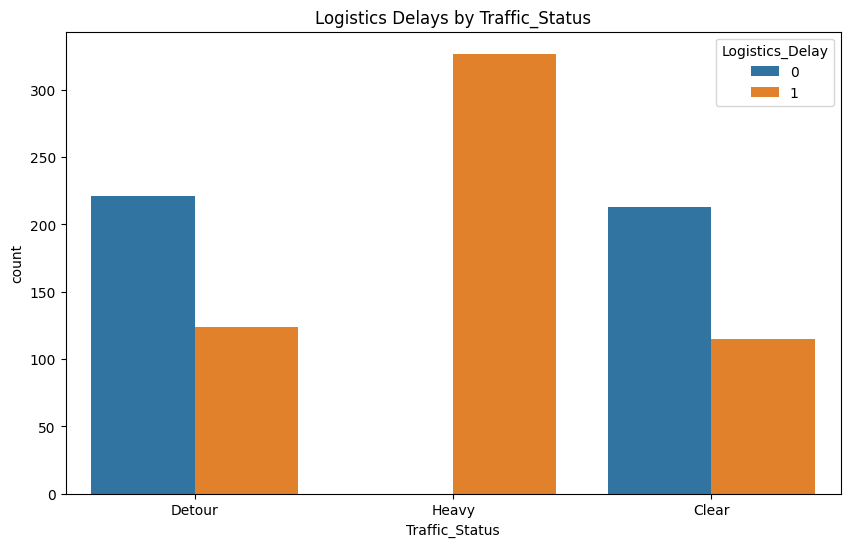

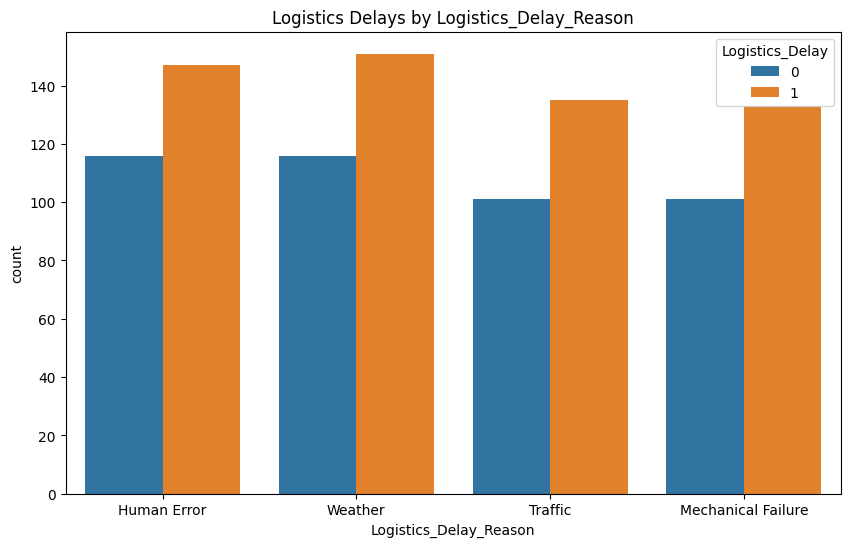

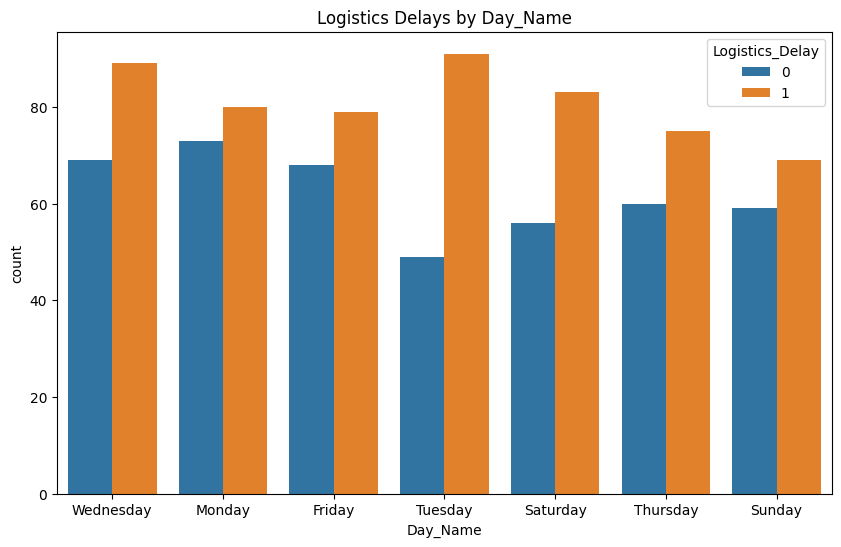

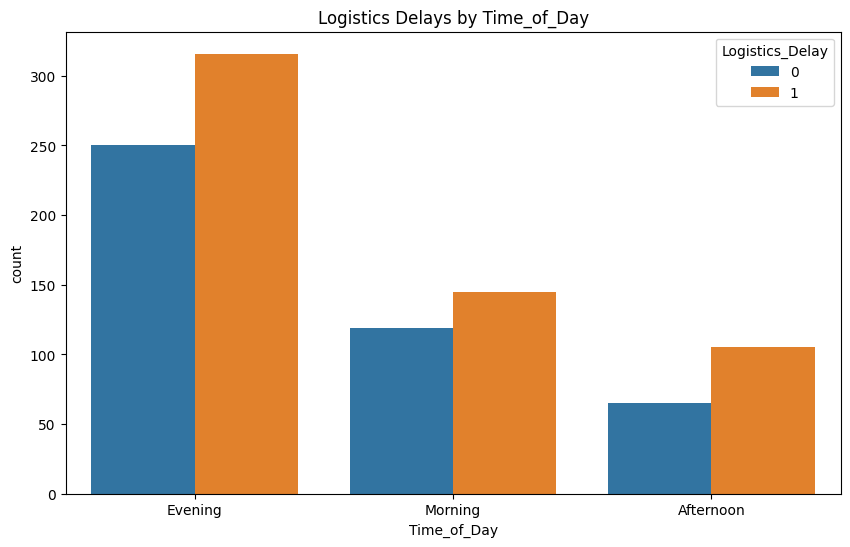

In [12]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x= feature, hue='Logistics_Delay', data=df)
    plt.title(f'Logistics Delays by {feature}')
plt.show()

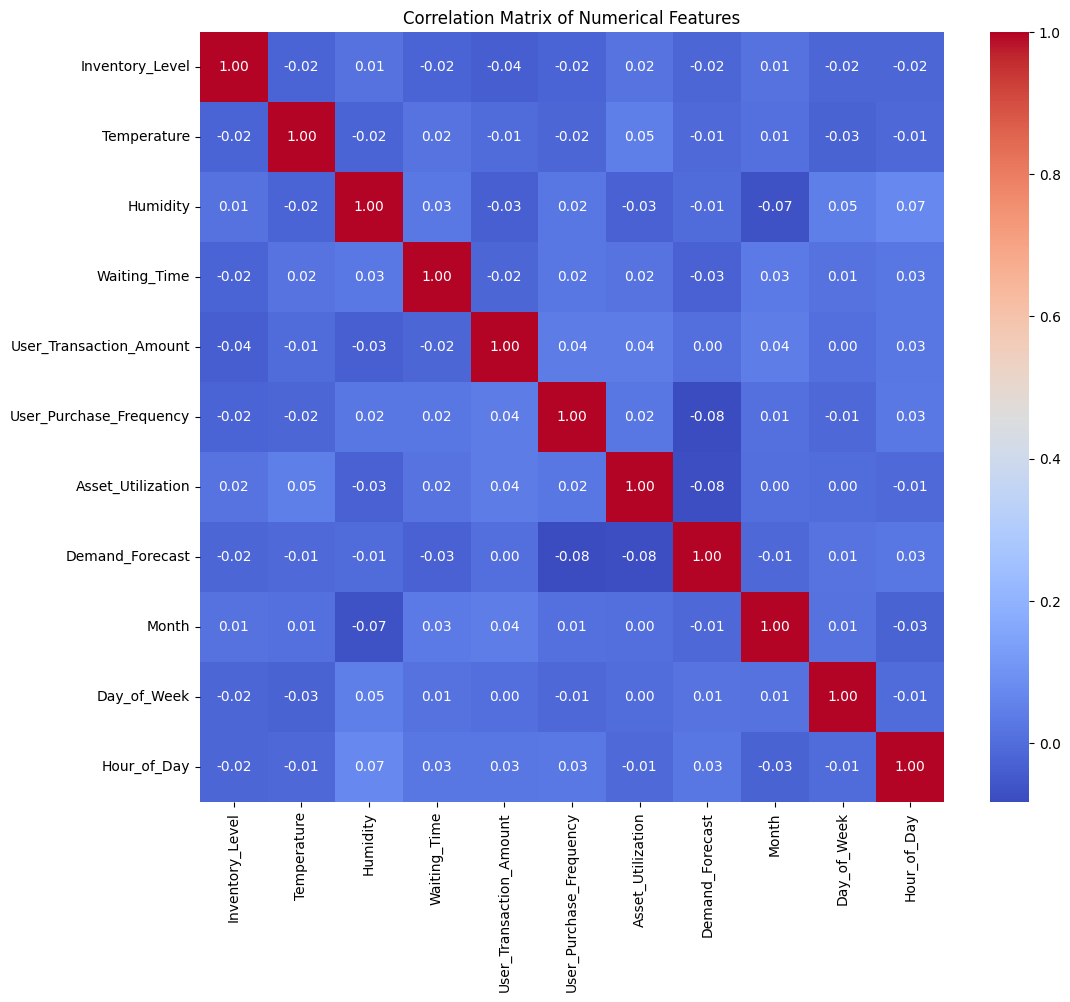

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [15]:
import plotly.express as px
fig = px.scatter_map(df, lat="Latitude", lon="Longitude", color="Logistics_Delay",
                        size_max=15, zoom=3,
                        title="Geographic Distribution of Logistics Delays")
fig.show()